In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from programs.utils.analyse_functies import *
SAVEFIGS = False
SAVEDATA = False
ruleset = 'strict'
matchtype_EN = 'marriages'
matchtype = 'huwelijk'

In [12]:
df = pd.read_csv('datafiles/dataframes/working/huwelijk_geboortes_familie_maanden_'+ ruleset + '_extended_15years.csv', sep="|")
df.event_date = pd.to_datetime(df.event_date)
df.mar_date = pd.to_datetime(df.mar_date)
df.sort_values(['id_1', 'event_date'], inplace=True)

In [13]:
df2 = pd.read_csv('datafiles/dataframes/working/huwelijk_geboortes_familie_maanden_'+ ruleset + '_extended_20years.csv', sep="|")
df2.event_date = pd.to_datetime(df2.event_date)
df2.mar_date = pd.to_datetime(df2.mar_date)
df2.sort_values(['id_1', 'event_date'], inplace=True)

In [14]:
pivot_15 = pd.pivot_table(df, values='id_1', columns='accepted', index='dist', aggfunc='count')
pivot_20 = pd.pivot_table(df2, values='id_1', columns='accepted', index='dist', aggfunc='count')

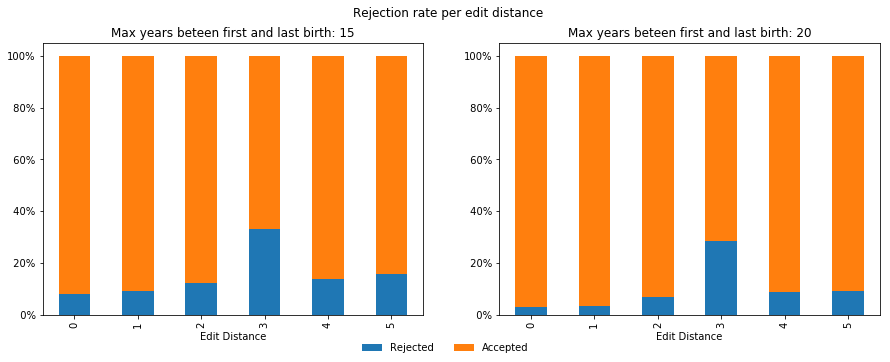

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
plot_15 = pivot_15.div(pivot_15.sum(1), axis=0)
ax_15 = plot_15.plot(kind='bar', stacked=True, ax=ax[0], title="Max years beteen first and last birth: 15", legend=False)
ax_15.set_xlabel("Edit Distance")
vals = ax_15.get_yticks()
ax_15.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

plot_20 = pivot_20.div(pivot_20.sum(1), axis=0)
ax_20 = plot_20.plot(kind='bar', stacked=True, ax=ax[1], title="Max years beteen first and last birth: 20", legend=False)
ax_20.set_xlabel("Edit Distance")
vals = ax_20.get_yticks()
ax_20.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

fig.suptitle("Rejection rate per edit distance for matches on " + matchtype_EN)
plt.figlegend(ax_20.get_legend_handles_labels()[0], ('Rejected', 'Accepted'), loc='lower center', ncol=2, frameon=False)

if SAVEFIGS:
    fig.savefig('reports/figures/' + matchtype_EN + '_rejection_rate_'+ ruleset + '.png', bbox_inches='tight')
    
plt.show()

In [6]:
def label_errors(row):
    if row.dist == 0:
        return '0'
    if row.dist == 1:
        return '1'
    if row.dist == 2:
        if row.dist_name_1 == 1 or \
        row.dist_name_2 == 1 or \
        row.dist_name_3 == 1 or \
        row.dist_name_4 == 1:
            return '1,1'
        else:
            return '2'
    if row.dist == 3:
        return label_edit_distance_3(row)
    if row.dist == 4:
        return label_edit_distance_4(row)
    if row.dist == 5:
        return label_edit_distance_5(row)
    
if 'Label' not in df.columns:
    df['Label'] = df.apply(label_errors, axis=1)

if 'Label' not in df2.columns:
    df2["Label"] = df2.apply(label_errors, axis=1)


In [10]:
df2.groupby('Label').count()

,id_1,event_date,dist,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,...,date_diff_month,mar_diff,abs_mar_diff,birth_before_mar,MIN_BIRTH_INTERVAL,MIN_MAR_INTERVAL,MAX_MAR_DIFF,months_since_first_birth,MAX_BIRTH_INTERVAL,accepted
Label,,,,,,,,,,,,,,,,,,,,,
0,374474,374474,374474,374474,374474,374474,374474,374474,374474,374474,...,374474,374474,374474,374474,374474,374474,374474,374474,374474,374474
1,101556,101556,101556,101556,101556,101556,101556,101556,101556,101556,...,101556,101556,101556,101556,101556,101556,101556,101556,101556,101556
"1,1",19218,19218,19218,19218,19218,19218,19218,19218,19218,19218,...,19218,19218,19218,19218,19218,19218,19218,19218,19218,19218
"1,1,1",2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
"1,1,1,1",37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
"1,1,1,2",74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
"1,1,2",915,915,915,915,915,915,915,915,915,915,...,915,915,915,915,915,915,915,915,915,915
"1,1,3",549,549,549,549,549,549,549,549,549,549,...,549,549,549,549,549,549,549,549,549,549
"1,2",12777,12777,12777,12777,12777,12777,12777,12777,12777,12777,...,12777,12777,12777,12777,12777,12777,12777,12777,12777,12777


In [7]:
pivot_20 = pd.pivot_table(df2, values='id_1', columns='accepted', index=['dist', 'Label'], aggfunc='count')

In [8]:
pivot_20

accepted      False   True 
dist Label                 
0    0        11106  363368
1    1         3407   98149
2    1,1        666   18552
     2         2502   25154
3    1,1,1      106    2042
     1,2       1585   11192
     3         7948   10772
4    1,1,1,1      5      32
     1,1,2       59     856
     1,3        185    2184
     2,2        116     780
5    1,1,1,2     10      64
     1,1,3       38     511
     1,2,2       34     297
     1,4         74     672

In [34]:
pivot_20.div(pivot_20.sum(1), axis=0)

accepted         False     True 
dist Label                      
0    0        0.029658  0.970342
1    1        0.033548  0.966452
2    1,1      0.034655  0.965345
     2        0.090469  0.909531
3    1,1,1    0.049348  0.950652
     1,2      0.124051  0.875949
     3        0.424573  0.575427
4    1,1,1,1  0.135135  0.864865
     1,1,2    0.064481  0.935519
     1,3      0.078092  0.921908
     2,2      0.129464  0.870536
5    1,1,1,2  0.135135  0.864865
     1,1,3    0.069217  0.930783
     1,2,2    0.102719  0.897281
     1,4      0.099196  0.900804

In [35]:
pv_1 = pd.pivot_table(df2[~df2.birth_before_mar], columns=["accepted", "MIN_BIRTH_INTERVAL"], index=["dist", "Label"], values="id_1", aggfunc='count')
pv_1['total'] = pv_1.sum(1)

In [36]:
pv_1

accepted            False              True     total
MIN_BIRTH_INTERVAL  False    True      True          
dist Label                                           
0    0              780.0  3832.0  363368.0  367980.0
1    1              143.0  1303.0   98149.0   99595.0
2    1,1             27.0   272.0   18552.0   18851.0
     2               64.0   702.0   25154.0   25920.0
3    1,1,1            7.0    28.0    2042.0    2077.0
     1,2             40.0   485.0   11192.0   11717.0
     3              222.0  2025.0   10772.0   13019.0
4    1,1,1,1          NaN     4.0      32.0      36.0
     1,1,2            NaN    13.0     856.0     869.0
     1,3              4.0    78.0    2184.0    2266.0
     2,2              4.0    32.0     780.0     816.0
5    1,1,1,2          NaN     NaN      64.0      64.0
     1,1,3            1.0    13.0     511.0     525.0
     1,2,2            NaN    15.0     297.0     312.0
     1,4             17.0    28.0     672.0     717.0

In [37]:
if SAVEDATA:
    df.to_csv('datafiles/dataframes/working/huwelijk_geboortes_familie_maanden_'+ ruleset + '_extended_15years.csv', sep="|", index=False)
    df2.to_csv('datafiles/dataframes/working/huwelijk_geboortes_familie_maanden_'+ ruleset + '_extended_20years.csv', sep="|", index=False)

In [13]:
df3 = pd.DataFrame()
df3['id_1'] = df2.id_1.unique()

In [14]:
df3['fam_size'] = df3.id_1.apply(lambda id1: df2[df2.id_1 == id1]['id_2'].size)

In [15]:
df2_id_1_group = df2[df2.MIN_BIRTH_INTERVAL].groupby('id_1')

In [16]:
def get_group(g, key):
    if key in g.groups: return g.get_group(key)
    return pd.DataFrame()

In [17]:
df3['fam_accepted'] = df3.id_1.apply(lambda id1: df2_id_1_group.get_group(id1).shape[0] if id1 in df2_id_1_group.groups else 0)

In [18]:
df3['diff'] = df3.fam_size - df3.fam_accepted

In [19]:
df3['accepted'] = df3['diff'] == 0

In [20]:
chances = df3[['fam_size', 'fam_accepted', 'accepted']].groupby(['fam_size', 'accepted']).count().unstack()

In [21]:
chances.div(chances.sum(1), axis=0).fillna(0).plot()

In [22]:
df3[['fam_size', 'accepted']].groupby('fam_size').count().plot.bar()

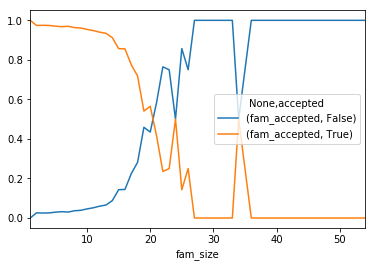

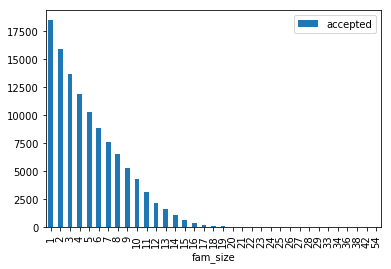

In [23]:
plt.show()

In [24]:
### Waarom lvl=0 ook rejected matches

df[(df.dist == 0) & (~df.accepted) & ~df.birth_before_mar ].groupby(['birth_before_mar', 'MIN_BIRTH_INTERVAL', 'MIN_MAR_INTERVAL', 'MAX_MAR_DIFF', 'MAX_BIRTH_INTERVAL']).count()


id_1  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL          
False            False              True             False        False                  14   
                                                     True         False                  47   
                                                                  True                  719   
                 True               True             False        False                 533   
                                                                  True                   17   
                                                     True         False               22829   

                                                                                      event_date  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL               
False            False              True             False        False                       14   
                                                     True         False                       47   
                                                                  True                       719   
                 True               True             False        False                      533   
                                                                  True                        17   
                                                     True         False                    22829   

                                                                                       dist  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL          
False            False              True             False        False                  14   
                                                     True         False                  47   
                                                                  True                  719   
                 True               True             False        False                 533   
                                                                  True                   17   
                                                     True         False               22829   

                                                                                      target_name_1  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL                  
False            False              True             False        False                          14   
                                                     True         False                          47   
                                                                  True                          719   
                 True               True             False        False                         533   
                                                                  True                           17   
                                                     True         False                       22829   

                                                                                      target_name_2  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL                  
False            False              True             False        False                          14   
                                                     True         False                          47   
                                                                  True                          719   
                 True               True             False        False                         533   
                                                                  True                           17   
                                                     True         False                       22829   

                                                                                      target_name_3  \
birth_befor

In [25]:
df2[(df2.dist == 0) & (~df2.accepted) & ~df.birth_before_mar ].groupby(['birth_before_mar', 'MIN_BIRTH_INTERVAL', 'MIN_MAR_INTERVAL', 'MAX_MAR_DIFF', 'MAX_BIRTH_INTERVAL']).count()

id_1  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL         
False            False              True             False        False                 14   
                                                     True         False                  9   
                                                                  True                 757   
                 True               True             False        False                528   
                                                                  True                  22   
                                                     True         False               3282   

                                                                                      event_date  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL               
False            False              True             False        False                       14   
                                                     True         False                        9   
                                                                  True                       757   
                 True               True             False        False                      528   
                                                                  True                        22   
                                                     True         False                     3282   

                                                                                      dist  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL         
False            False              True             False        False                 14   
                                                     True         False                  9   
                                                                  True                 757   
                 True               True             False        False                528   
                                                                  True                  22   
                                                     True         False               3282   

                                                                                      target_name_1  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL                  
False            False              True             False        False                          14   
                                                     True         False                           9   
                                                                  True                          757   
                 True               True             False        False                         528   
                                                                  True                           22   
                                                     True         False                        3282   

                                                                                      target_name_2  \
birth_before_mar MIN_BIRTH_INTERVAL MIN_MAR_INTERVAL MAX_MAR_DIFF MAX_BIRTH_INTERVAL                  
False            False              True             False        False                          14   
                                                     True         False                           9   
                                                                  True                          757   
                 True               True             False        False                         528   
                                                                  True                           22   
                                                     True         False                        3282   

                                                                                      target_name_3  \
birth_before_mar MIN_BIRTH

In [26]:
df[~df.MAX_BIRTH_INTERVAL]

,id_1,event_date,dist,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,...,mar_diff,abs_mar_diff,birth_before_mar,MIN_BIRTH_INTERVAL,MIN_MAR_INTERVAL,MAX_MAR_DIFF,months_since_first_birth,MAX_BIRTH_INTERVAL,accepted,Label
4,698559,1839-06-23 00:00:00,0,ferdinandus,kroes,victoria,strobbe,624202,ferdinandus,kroes,...,235,235,False,True,True,True,221.0,False,False,0
22,698564,1906-08-04,0,petrus,schram,ursula,reu,177256,petrus,schram,...,228,228,False,True,True,True,203.0,False,False,0
23,698564,1912-03-09,0,petrus,schram,ursula,reu,101677,petrus,schram,...,295,295,False,True,True,True,270.0,False,False,0
37,698571,1813-01-25 00:00:00,3,jacobus,bruine,maria,weele,285067,jacobus,bruijne,...,-1216,1216,True,False,False,True,-1198.0,False,False,"1,2"
36,698571,1819-04-17 00:00:00,3,jacobus,bruine,maria,weele,609071,jacobus,bruijne,...,-1141,1141,True,False,False,True,-1123.0,False,False,"1,2"
35,698571,1833-07-19 00:00:00,3,jacobus,bruine,maria,weele,449198,jacobus,bruine,...,-970,970,True,False,False,True,-951.0,False,False,3
45,698572,1880-01-22 00:00:00,0,krijn,langeraad,neeltje,doeleman,473162,krijn,langeraad,...,223,223,False,True,True,True,211.0,False,False,0
47,698574,1856-04-18 00:00:00,3,willem,boot,elizabeth,blom,28402,willem,kroon,...,-518,518,True,False,False,True,-18.0,False,False,3
63,698580,1874-02-03 00:00:00,0,nicolaas,duinen,christina,wind,127303,nicolaas,duinen,...,221,221,False,True,True,True,205.0,False,False,0
76,698591,1896-03-09 00:00:00,0,adriaan,marijs,johanna,joziasse,534534,adriaan,marijs,...,197,197,False,True,True,True,183.0,False,False,0
